# What is the Best Neighborhood in Pittsburgh?
### *Team Fam, LLC*
## Introduction:
Using data from WPRDC, we aimed to find the best nieghborhood in Pittsburgh. Since everyone's definition of "bestness" may be different, we decided to approach this from the angle of raising a family. So, what makes a neighborhood family friendly? As a parent or guardian, one would want to raise their children in an environment that promotes development and learning through a strong school system, safety and quietness through a low crime rate, and social and physical well-being through local entertainment facilities. Ultimately, this all boils down two three main ideas:
*Education, Safety, and Entertainment*.
## The Metric
In order to measure these attributes, we used the following data:
- [School Enrollment](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-school-enrollment/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f)
- [Non-Traffic Citations](https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86?view_id=868aea6a-f85a-4547-8402-80c639555f13)
- [Playgrounds](https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367)

School enrollment data allowed us to see the percentage of the community enrolled in school (pre-college), non-traffic citations gave us information on the amount of crime in the area, and playground data provided a number of playground facilities available in each neighborhood. By implementing a simple scoring system that assigned values to each neighborhood based on their position in sorted data (the lowest score wins), we were able to show promising results that helped us determine the best neighborhood in Pittsburgh to raise a family. 

## School Enrollment:
To study and display our data, we used pandas tables and graphs. The school enrollment data from WPRDC included those enrolled in nursery school through graduate school. Since Pittsburgh houses a high volume of college students, we decided that this part of the data would skew the result. So, we revised the dataset to only take into account those enrolled in grade 12 and under.
As the top ten neighborhoods in the sorted data shows, Homewood North has the highest percentage of school age children enrolled in school. All of the following data was added to a dictionary which tracks the scores of all neighborhoods in the city.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import raw dataset
enrollment_data_raw = pd.read_csv("Enrollment-Data.csv")
# Pull columns needed for operations
enrollment_data_edit = enrollment_data_raw[["Neighborhood","Estimate; Total:","Estimate; Enrolled in school:",\
                                            "Estimate; Enrolled in school: - Enrolled in college, undergraduate years",\
                                            "Estimate; Enrolled in school: - Graduate or professional school"]]

# Editing the columns so the total and total enrolled does not include college students
enrollment_data_edit["Enrolled In College"] = enrollment_data_raw["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"] + enrollment_data_raw["Estimate; Enrolled in school: - Graduate or professional school"]
enrollment_data_edit["Total"] = enrollment_data_edit["Estimate; Total:"] - enrollment_data_edit["Enrolled In College"]
enrollment_data_edit["Total Enrolled"] = enrollment_data_edit["Estimate; Enrolled in school:"] - enrollment_data_edit["Enrolled In College"]

# Creating a final data set with only the data needed and adding a column with the percentage enrolled
enrollment_data = enrollment_data_edit[["Neighborhood","Total","Total Enrolled"]]
enrollment_data["Percentage Enrolled In School"] = (enrollment_data["Total Enrolled"] / enrollment_data["Total"])*100
enrollment_data = enrollment_data[["Neighborhood", "Percentage Enrolled In School"]]

#Sorting the values by percentage and displaying the data
enrollment_data.sort_values(by = "Percentage Enrolled In School", ascending = False, inplace = True)
enrollment_data.reset_index(inplace = True, drop = True)
enrollment_data.head(10)

<ipython-input-2-17afe8ceb70e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollment_data_edit["Enrolled In College"] = enrollment_data_raw["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"] + enrollment_data_raw["Estimate; Enrolled in school: - Graduate or professional school"]
<ipython-input-2-17afe8ceb70e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollment_data_edit["Total"] = enrollment_data_edit["Estimate; Total:"] - enrollment_data_edit["Enrolled In College"]
<

,Neighborhood,Percentage Enrolled In School
0,Homewood North,35.496737
1,Allentown,33.003016
2,Northview Heights,32.731377
3,Knoxville,31.243301
4,Elliott,31.046312
5,Bedford Dwellings,25.509372
6,Bon Air,25.263158
7,Mount Oliver Borough,23.436493
8,St. Clair,23.371648
9,Sheraden,23.153381


Text(0, 0.5, 'Neighborhood')

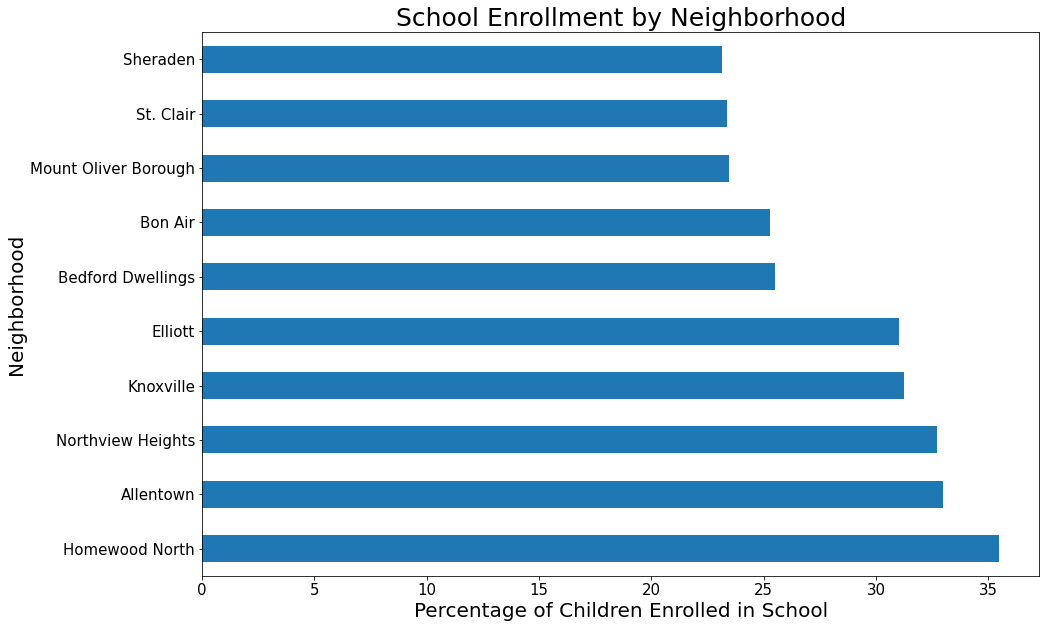

In [3]:
# Plotting the data on a bar graph
enrollment_graph = enrollment_data.head(10).plot.barh(x = "Neighborhood",figsize = (15,10), legend = None, fontsize = 15)
enrollment_graph.set_title("School Enrollment by Neighborhood", fontsize = 25)
enrollment_graph.set_xlabel("Percentage of Children Enrolled in School", fontsize = 20)
enrollment_graph.set_ylabel("Neighborhood", fontsize = 20)

In [4]:
scores = dict()

for item in enrollment_data["Neighborhood"]:
    if item not in scores:
        scores[item] = enrollment_data[enrollment_data["Neighborhood"] == item].index[0]
    else:
        scores[item] += enrollment_data[enrollment_data["Neighborhood"] == item].index[0]
scores

{'Homewood North': 0,
 'Allentown': 1,
 'Northview Heights': 2,
 'Knoxville': 3,
 'Elliott': 4,
 'Bedford Dwellings': 5,
 'Bon Air': 6,
 'Mount Oliver Borough': 7,
 'St. Clair': 8,
 'Sheraden': 9,
 'Homewood South': 10,
 'Crafton Heights': 11,
 'Hazelwood': 12,
 'Spring Hill-City View': 13,
 'New Homestead': 14,
 'Perry South': 15,
 'Windgap': 16,
 'Fineview': 17,
 'Garfield': 18,
 'Larimer': 19,
 'East Hills': 20,
 'Lincoln-Lemington-Belmar': 21,
 'Mt. Oliver': 22,
 'Glen Hazel': 23,
 'Squirrel Hill North': 24,
 'Regent Square': 25,
 'Carrick': 26,
 'Highland Park': 27,
 'Upper Lawrenceville': 28,
 'East Liberty': 29,
 'Crawford-Roberts': 30,
 'Terrace Village': 31,
 'Brookline': 32,
 'Chartiers City': 33,
 'Stanton Heights': 34,
 'Point Breeze': 35,
 'Brighton Heights': 36,
 'Allegheny Center': 37,
 'Arlington': 38,
 'California-Kirkbride': 39,
 'Overbrook': 40,
 'Upper Hill': 41,
 'Swisshelm Park': 42,
 'Homewood West': 43,
 'Central Northside': 44,
 'Lower Lawrenceville': 45,
 'Squ

## Safety - Non-traffic Citations:
INSERT INTRO AND SUMMARY OF FINDINGS HERE

In [5]:
## Enter code here

## Playgrounds:
INSERT INTRO AND SUMMARY OF FINDINGS HERE

In [6]:
## Enter code here

## Conclusion
